<h3>Training Model</h3>

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv


In [2]:
df=pd.read_csv("/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv")
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

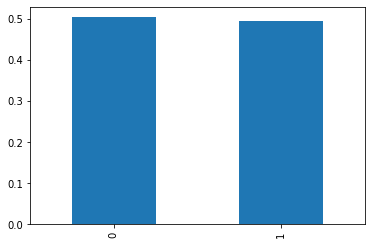

In [4]:
df["is_depression"].value_counts(normalize=True).plot(kind="bar")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [6]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [7]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...


True

In [8]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

Removing stopwords and using lemmatizer

In [9]:
w=WordNetLemmatizer()
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]', ' ', df["clean_text"][i])
  review=review.lower()
  review=review.split()
  review=[w.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
  review=" ".join(review)
  df["clean_text"][i]=review
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


In [10]:
# print(df["clean_text"][0])

Finding out vocabulary size of the dataset, by counting unique words

In [11]:
# for i in df["clean_text"]:
#     print(len(i))

In [12]:
s=set()
for i in range(len(df)):
    k=df["clean_text"][i].split()
    for j in range(len(k)):
        s.add(k[j])
len(s)

18611

Finding out one hot representaion of each sentence

In [13]:
voc_size=18611
onehot_repr1=[one_hot(words,voc_size)for words in df["clean_text"]]

In [14]:
# display(len(onehot_repr1))
# # display(onehot_repr1)
# display(df["clean_text"].shape)
# display(df["clean_text"])

# for words in df["clean_text"]:
#     print(words)
#     break

# for i in onehot_repr1:
#     print(len(i))
#     print(i)
#     break

In [15]:
max=0
for i in onehot_repr1:
    if len(i)>max:
        max=len(i)
max

1844

Converting one hot encodings to word embeddings

In [16]:
sent_length=max
embedded_docs1=pad_sequences(onehot_repr1,padding='pre',maxlen=sent_length)

In [17]:
# print(len(embedded_docs1))
# print(embedded_docs1[0])

In [18]:
embedding_vector_features=sent_length*2
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add((LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

2022-10-31 02:15:38.236180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 02:15:38.339059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 02:15:38.339866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 02:15:38.341061: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1844, 3688)        68637368  
_________________________________________________________________
lstm (LSTM)                  (None, 100)               1515600   
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 70,153,069
Trainable params: 70,153,069
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
Y=df["is_depression"]
# Y.head()

In [20]:
Y.shape

(7731,)

In [21]:
embedded_docs1.shape

(7731, 1844)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(embedded_docs1,Y,test_size=0.15,random_state=42,stratify=Y)

In [23]:
# print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

In [24]:
# model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=16, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=16)

2022-10-31 02:15:41.158585: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-31 02:15:43.474479: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


411/411 [==============================] - 63s 144ms/step - loss: 0.1450 - accuracy: 0.9475 - val_loss: 0.0988 - val_accuracy: 0.9664
Epoch 2/10
411/411 [==============================] - 59s 142ms/step - loss: 0.0393 - accuracy: 0.9851 - val_loss: 0.1050 - val_accuracy: 0.9707
Epoch 3/10
411/411 [==============================] - 58s 142ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.1614 - val_accuracy: 0.9595
Epoch 4/10
411/411 [==============================] - 58s 142ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.1348 - val_accuracy: 0.9638
Epoch 5/10
411/411 [==============================] - 59s 142ms/step - loss: 0.0051 - accuracy: 0.9979 - val_loss: 0.1681 - val_accuracy: 0.9586
Epoch 6/10
411/411 [==============================] - 59s 143ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.2467 - val_accuracy: 0.9534


In [25]:
# print(X_test)
# print(len(X_test))
# print(len(X_test[0]))
# print(type(X_test[0]))

In [26]:
Y_pred=model.predict(X_test)

In [27]:
# print(Y_pred)
# print(len(Y_pred))

In [28]:
Y_pred=(Y_pred>=0.5).astype("int")

In [29]:
# print(Y_pred)
# print(len(Y_pred))

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       585
           1       0.99      0.94      0.97       575

    accuracy                           0.97      1160
   macro avg       0.97      0.97      0.97      1160
weighted avg       0.97      0.97      0.97      1160

[[578   7]
 [ 32 543]]


In [31]:
# save model
model.save('/kaggle/working/LSTM_RNN_model_ver1.h5')

# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

<h3>Keep tracks of chat status</h3>

In [39]:
userInput=dict()
userInputDf = pd.DataFrame(columns = ['input', 'is_depressed'])
score=0

In [40]:
def preprocessInput(input):
    # remove stop words
    w=WordNetLemmatizer()
    # for i in range(len(df)):
    review=re.sub('[^a-zA-Z]', ' ', input)
    review=review.lower()
    review=review.split()
    review=[w.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    inputWoStopWord=review
#     print("==================1==================")
#     print(inputWoStopWord)
    
    # get onehot representation
#     print("==================2==================")
    voc_size=18611
#     newdf= df[['clean_text']].copy()
#     print(newdf.head())
#     inputWoStopWord = pd.DataFrame({'points': [inputWoStopWord]})
#     newdf.append(inputWoStopWord)
#     print(newdf.shape)
#     onehot_repr1=[one_hot(words,voc_size)for words in newdf]
    input_onehot=one_hot(inputWoStopWord,voc_size)
#     print(input_onehot)
    
    # convert onehot word embadings
#     print("==================3==================")
#     print(len(input_onehot))
#     onehot_doc.append(input_onehot)
#     embedded=pad_sequences(onehot_doc,padding='pre',maxlen=1844)
#     print("==================end 3==================")
#     print(len(embedded))
#     print(type(embedded))
#     print(embedded[len(embedded)-1])
#     print(len(embedded[len(embedded)-1]))
#     print(len(embedded[0]))
#     return embedded[len(embedded)-1]
    return pad_sequences([input_onehot],padding='pre',maxlen=1844)

def depressionDetection(input):
    processedInput=preprocessInput(input)
    pred=model.predict(processedInput)
    pred=(pred>=0.5).astype("int")
    userInput.update({input: pred[0][0]})
    global userInputDf 
    userInputDf = userInputDf.append({'input' : input, 'is_depressed' : pred[0][0]}, ignore_index = True)
#     display(userInputDf)
    updateScore()
    
def updateScore():
    # score = # depressed input / # total input
    depressedCount = userInputDf[userInputDf['is_depressed'] == 1].shape[0]
    global score
    score = round(depressedCount/userInputDf.shape[0],2)

def getScore():
    return score

In [41]:
inputList=["sometimes i feel like theres no one to talk to", 
            "english isn t my first language so i apologise if i use the wrong terminology i also have issue with my brain memory focus not only due to adhd but also because i ve been completely burned out exhaustive depression several time in my life", 
            "we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat or any kind of offsite communication early in the conversion is showing either bad intention or bad judgement either way it s unwise to trust them pm me anytime seems like a kind and generous offer and it might be perfectly well meaning but unless and until a solid rapport ha been established it s just not a wise idea here are some point to consider before you offer or accept an invitation to communicate privately by posting supportive reply publicly you ll help more people than just the op if your response are of good quality you ll educate and inspire other helper the 9 90 rule http en wikipedia org wiki rule internet culture applies here a much a it doe anywhere else on the internet people who are struggling with serious mental health issue often justifiably have a low tolerance for disappointment and a high level of ever changing emotional need unless the helper is able to make a 00 commitment to be there for them in every way for a long a necessary offering a personal inbox a a resource is likely to do more harm than good this is why mental health crisis line responder usually don t give their name and caller aren t allowed to request specific responder it s much healthier and safer for the caller to develop a relationship with the agency a a whole analogously it s much safer and healthier for our ops to develop a relationship with the community a a whole even trained responder are generally not allowed to work high intensity situation alone it s partly about availability but it s mostly about wider perspective and preventing compassion fatigue if a helper get in over their head with someone whose mental health issue including suicidality which is often comorbid with depression escalate in a pm conversation it s much harder for others including the r depression and r suicidewatch moderator to help contrary to common assumption moderator can t see or police pm in our observation over many year the people who say pm me the most are consistently the one with the least understanding of mental health issue and mental health support we all have gap in our knowledge and in our ability to communicate effectively community input mitigates these limitation there s no reason why someone who s truly here to help would want to hide their response from community scrutiny if helper are concerned about their own privacy keep in mind that self disclosure when used supportively is more about the feeling than the detail and that we have no problem here with the use of alt throwaway account and have no restriction on account age or karma we all know the internet is used by some people to exploit or abuse others these people do want to hide their deceptive and manipulative response from everyone except their victim there are many of them who specifically target those who are vulnerable because of mental health issue if a helper invite an op to talk privately and give them a good supportive experience they ve primed that person to be more vulnerable to abuser this sort of cognitive priming tends to be particularly effective when someone s in a state of mental health crisis when people rely more on heuristic than critical reasoning if ops want to talk privately posting on a wide open anonymous forum like reddit might not be the best option although we don t recommend it we do allow ops to request private contact when asking for support if you want to do this please keep your expectation realistic and to have a careful look at the history of anyone who offer to pm before opening up to them", 
            "ilearn is down and out great considering final are this week",
            "im so sad that theres no one talking to me everyday",
            "what is the meaning of life. i feel that theres is no point",
            "this is not the kind of life that i want",
            "how are you doing today",
            "so tired everyday"]

for input in inputList:
    depressionDetection(input)

display(userInputDf)
print(getScore())

,input,is_depressed
0,sometimes i feel like theres no one to talk to,0
1,english isn t my first language so i apologise...,1
2,we understand that most people who reply immed...,1
3,ilearn is down and out great considering final...,0
4,im so sad that theres no one talking to me eve...,0
5,what is the meaning of life. i feel that there...,0
6,this is not the kind of life that i want,1
7,how are you doing today,0
8,so tired everyday,1


0.44
